# 25. Reverse Nodes in k-Group

### Difficulty: <font color = red> Hard </font>

---

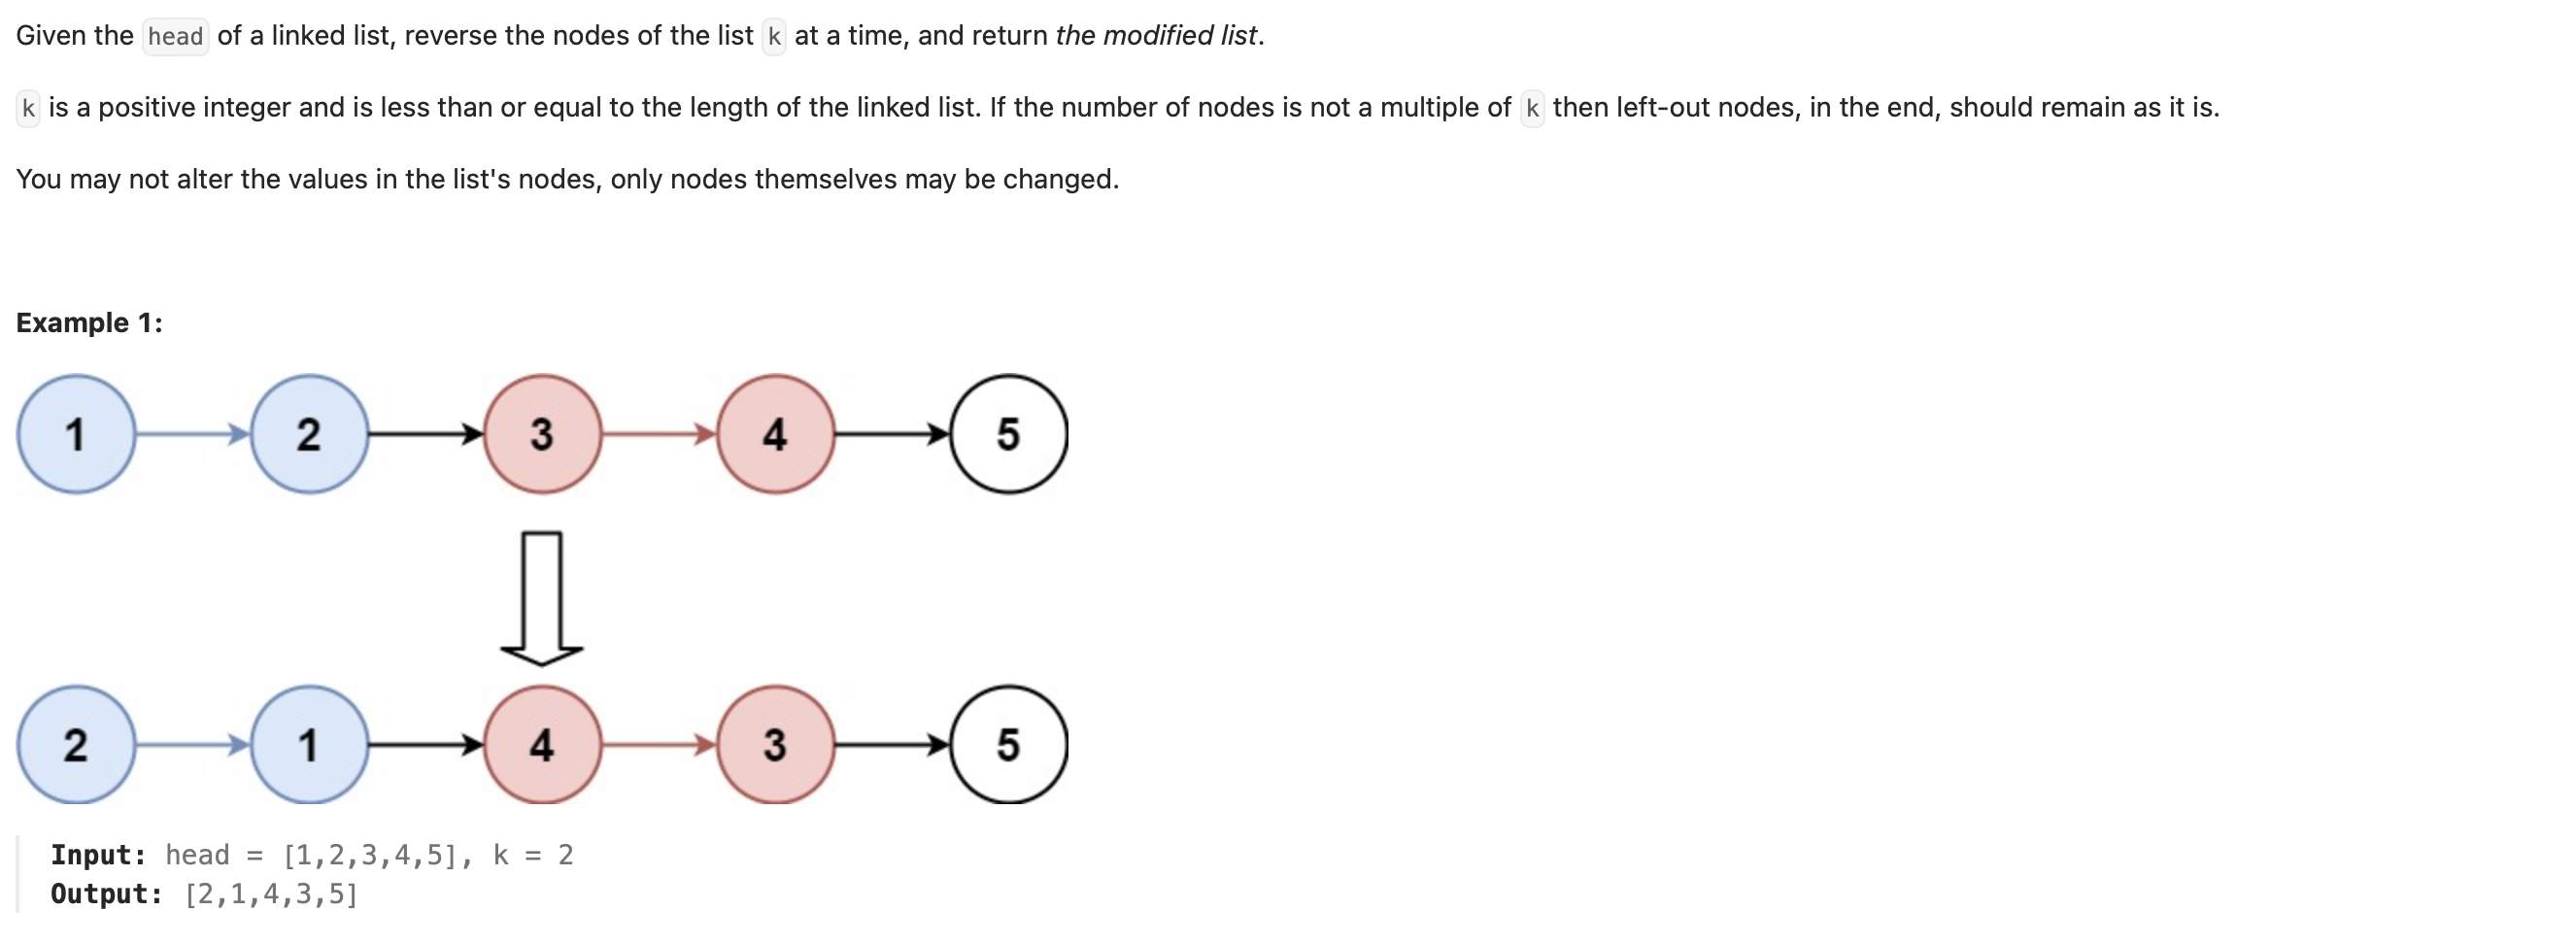

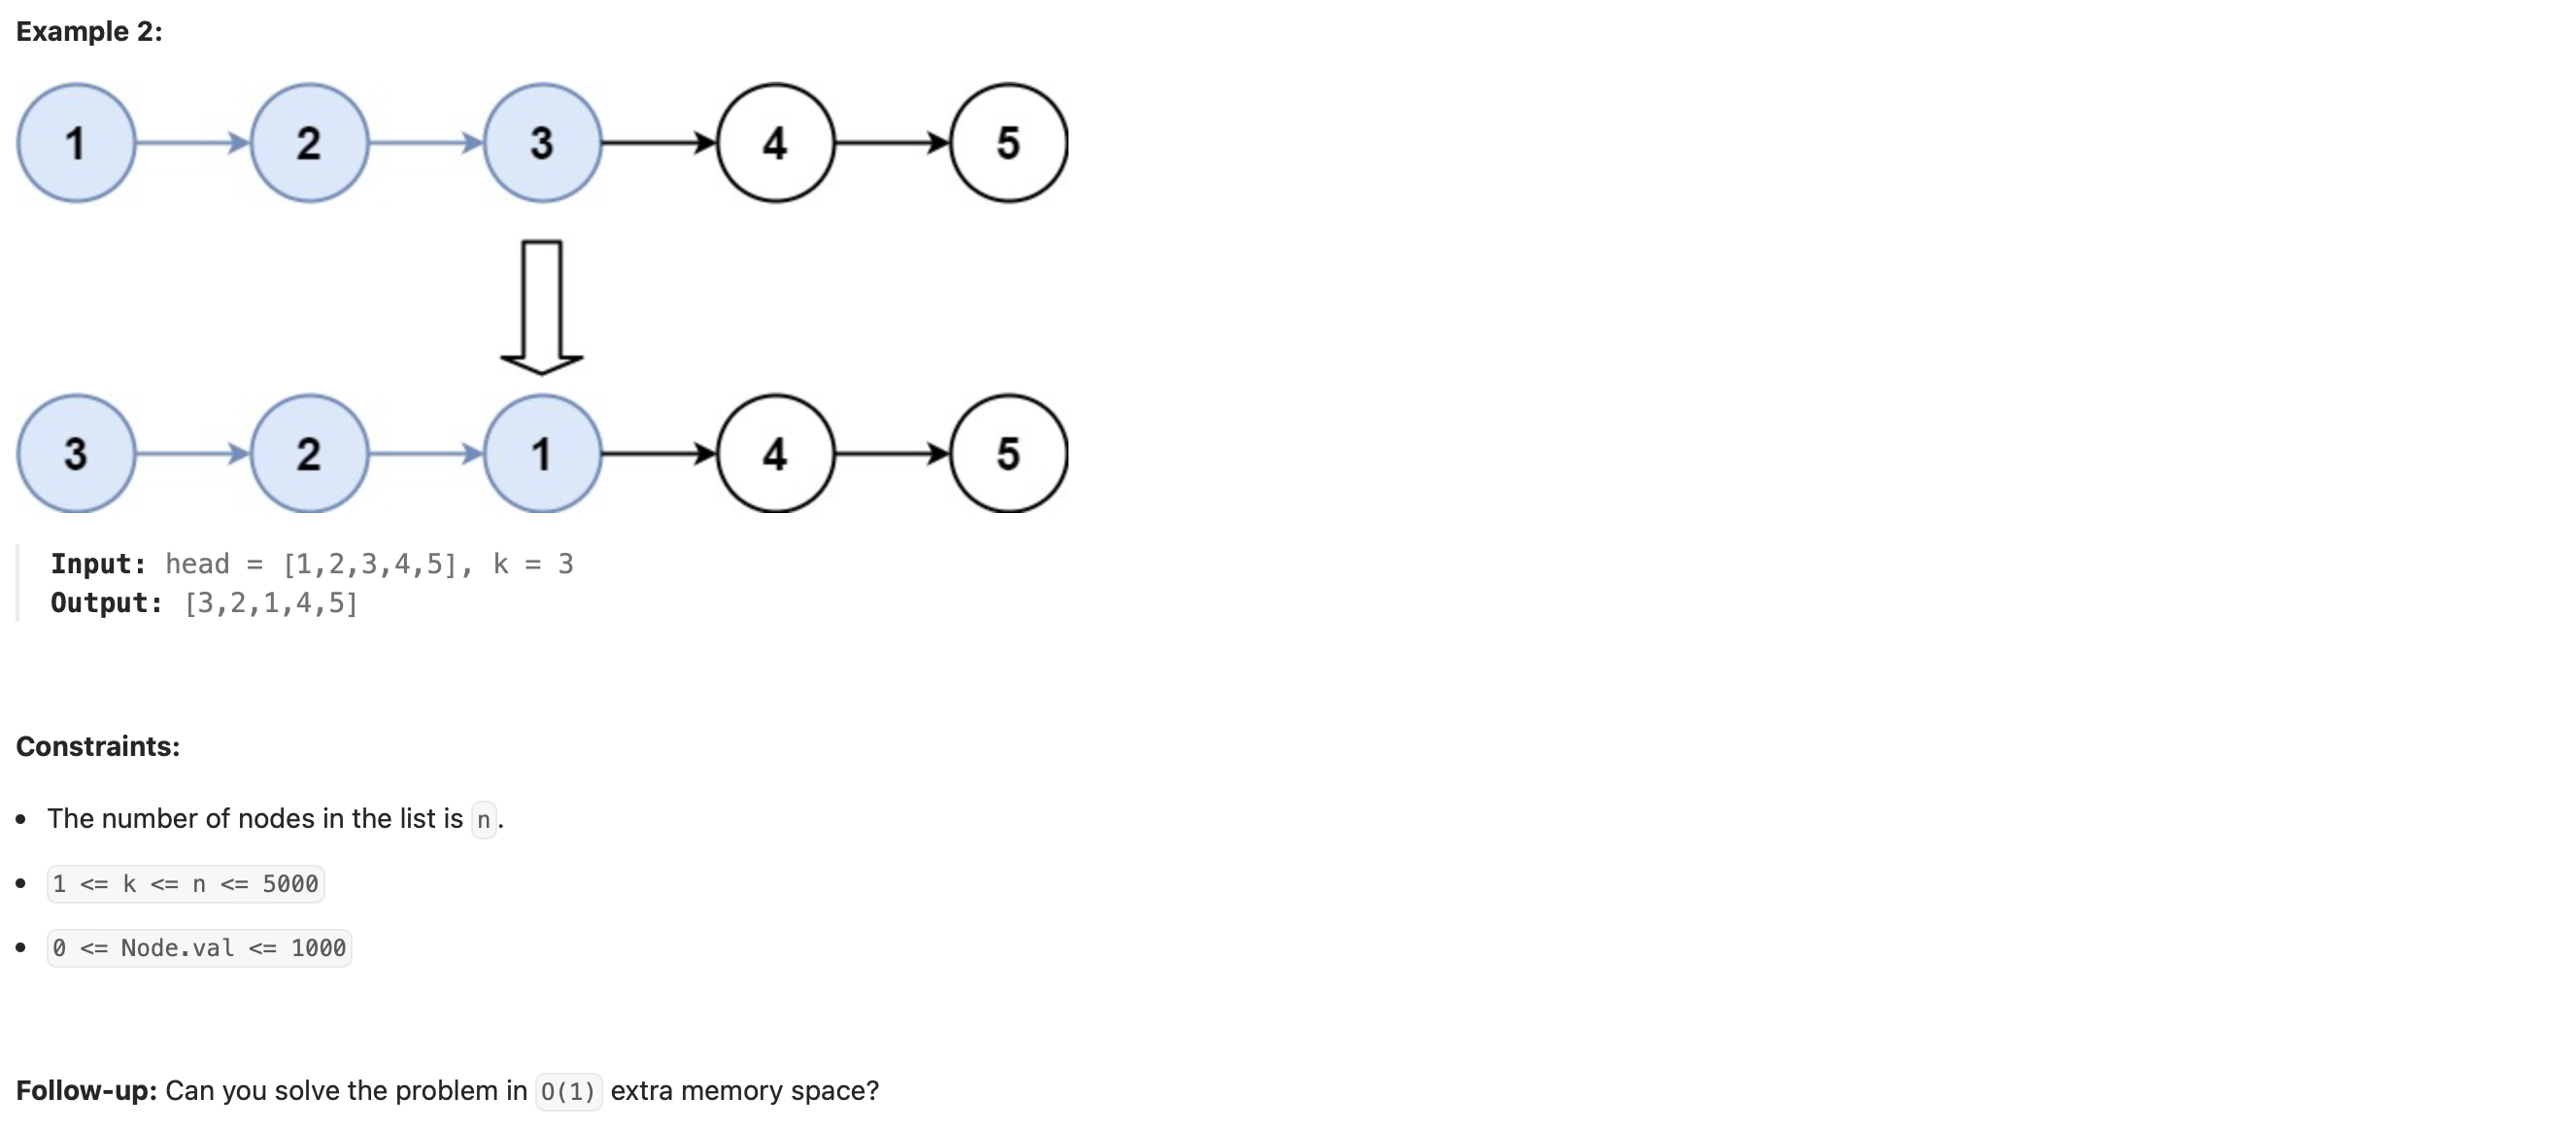

## Approach Overview:

Scan through the input list and reverse `k` nodes at a time. For each group reversal, ensure they are correctly connected to both the group before them and the group after them. Make sure the head node of the current reversed group connects to the tail node of the previous group and make sure the tail node of the current reversed group connects to the head node of the next group (i.e. the group after the current one).

ChatGPT version:

Traverse the input list and reverse nodes in groups of `k`. 

After reversing each group, ensure proper linkage with adjacent groups: connect the **head of the current reversed group** to the **tail of the preceding group** and connect the **tail of the current reversed group** to the **head of the next group**.

## Detailed Explanation:


The goal of this solution is to reverse nodes in the linked list in groups of `k` while maintaining proper connectivity between different groups. To accomplish this, we break down the problem into three main parts:

1. **Initialization**:

- We start by creating a **dummy node** (`dummy`), which is linked to the head of the original list. This dummy node helps simplify edge cases, especially for the first group, and keeps track of the new head of the modified list.
   
- We also maintain a pointer (`previousGroup`) to track the tail of the group that was last processed, initialized to the dummy node.


2. **Processing Groups**:

The list is processed in groups of `k` nodes. For each iteration, the algorithm:

- Finds the **kth node** in the current group using the helper function `findKthNode()`. This is necessary to ensure there are enough nodes left to form a complete group for reversal.
- If a complete group of `k` nodes is available, it is **reversed** using the helper function `reverseGroup()`. If fewer than `k` nodes are left, the loop terminates without making changes.

3. **Reversing and Linking Groups**:
 
For each group of `k` nodes:

- **Reverse the Nodes**: The `reverseGroup()` function performs the reversal of nodes in the current group.
- It starts by saving pointers to the **start** (`groupStart`) and **end** (`groupNext`) of the current group.

- A `while` loop is used to reverse the pointers of nodes within the group until the end of the current group is reached.
     - **Link with Adjacent Groups**: After reversing the nodes, it links:
     - The **tail** of the previous group (`previousGroup.next`) to the **new head** of the current group (`kth`).
     - The **tail** of the current group (`groupStart`, which becomes the last node after reversal) to the **next group** (`groupNext`).
     - Finally, update `previousGroup` to point to the new tail (`groupStart`) for the next iteration.

4. **Returning the Result**:

- The modified list is returned by referencing `dummy.next`, which points to the new head of the list after all group reversals are completed.

**Helper Functions**:

- **`findKthNode(previous, k)`**:

- This function identifies the **kth node** in the current group, starting from the `previous` node. If there aren’t enough nodes to form a complete group, it returns `None`.

- **`reverseGroup(previous, kth)`**:

- This function reverses the nodes in the current group starting from the node after `previous` up to the node `kth`.

- After reversing, it links the newly reversed group with the previous and next groups, and returns the new tail of the reversed group.

**Key Points**:

- The **dummy node** simplifies managing connections for the first group and provides a consistent way to return the new head of the list.

- Maintaining pointers to the start (`groupStart`), end (`groupNext`), and previous group (`previousGroup`) helps in ensuring that each reversed group is **correctly linked** to the rest of the list.

- The solution ensures that each group is only reversed if there are **enough nodes** (`k` nodes) to form a complete group.

This approach ensures that the time complexity remains **O(n)**, where `n` is the number of nodes in the linked list, as each node is visited a constant number of times. The space complexity is **O(1)** since the reversal is performed in place without using additional data structures.


## Key Challenges:

1. EVERYTHING WAS HARD. COULDNT DO ZILCH. SADLY :(

## Solution:

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next

class Solution:
    
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        
        # intialize a dummy node and link it to the head node
        previousGroup = dummy = ListNode(-1, head)
        
        # continue to run indefinitely until we terminate with a break statement
        while True:

            # find the kth node in the current group
            kthNode = self.findKthNode(previousGroup, k)
            
            # check if the node is NULL
            if kthNode is None:
                # terminate the loop
                break
            
            # reverse the current group, link to the previous and next group 
            # and then update the position of the previousGroup to process the next group
            previousGroup = self.reverseGroup(previousGroup, kthNode)
        
        # return the head of the modified list
        return dummy.next

    def findKthNode(self, previous, k):
        'This function will identify the kth node (the last node) in the current group of nodes being processed'
        
        # set currentNode to previous
        currentNode = previous

        # loop k times
        for _ in range(k):
            
            # move to the next node in the group 
            currentNode = currentNode.next
            if currentNode is None:  # Check if there are not enough nodes
                return None

        return currentNode

    def reverseGroup(self, previous, kth):
        'This function reverses the current group of k nodes, 
        'links it to the preceding and next groups, and returns the new tail of the reversed group'

        # set `curr` to the second node node of the current group (before reversal)
        curr = previous.next.next

        # Set `groupStart` and `prev` to the first node of the current group (before reversal)
        groupStart = prev = previous.next

        # Set `groupNext` to the first / head node in the NEXT group
        groupNext = kth.next
        
        # link the tail node of the previous group to the head node of the current group after reversal
        previous.next = kth
        
        # link the head node of the NEXT group to the tail node of the current group after reversal
        groupStart.next = groupNext
        
        # continue as long as we are within the bounds of the current group
        while curr != groupNext:
            
            # store the next node in tmp
            tmp = curr.next
            # reverse the next pointer of the current node
            curr.next = prev
            # set previous to current node
            prev = curr
            # move current node to the next node in list
            curr = tmp
      
        # return the tail node of the reversed group
        return groupStart    